## Introduction
Predicting customer car category preference using Multinomial Logistic Regression.
**Multinomial Logistic Regression**.

In [9]:
#  Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



## Load Dataset

In [10]:
# Load the dataset
df = pd.read_csv(r'C:\Users\ShaileshT\Car-Sales-Trend_DS7\data\carsales.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


## Clean Column Names


In [11]:
# Clean column names for easier access
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('[$()]', '', regex=True)
df.columns

Index(['Car_id', 'Date', 'Customer_Name', 'Gender', 'Annual_Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price_', 'Dealer_No', 'Body_Style', 'Phone', 'Dealer_Region'],
      dtype='object')

## Define Target 

In [12]:
# Define target variable
y = df['Body_Style']

# Select features for input
selected_cols = ['Gender', 'Annual_Income', 'Dealer_Region', 'Company', 'Engine', 'Transmission', 'Price_']
X = df[selected_cols]

## Encode Categorical Features

In [14]:
# Define categorical and numerical columns
categorical_cols = ['Gender', 'Dealer_Region', 'Company', 'Engine', 'Transmission']
numerical_cols = ['Annual_Income', 'Price_']

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Apply the transformer and split data
X_processed = preprocessor.fit_transform(X)
X_processed.shape

(23906, 40)

## Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, stratify=y, random_state=42)

## Train the Logitstic Regression Model

In [17]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

c:\Users\ShaileshT\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

## Evaluate the Model


              precision    recall  f1-score   support

     Hardtop       0.54      0.08      0.14       594
   Hatchback       0.36      0.40      0.38      1226
   Passenger       0.43      0.18      0.26       789
         SUV       0.38      0.62      0.47      1275
       Sedan       0.44      0.45      0.45       898

    accuracy                           0.39      4782
   macro avg       0.43      0.35      0.34      4782
weighted avg       0.41      0.39      0.36      4782



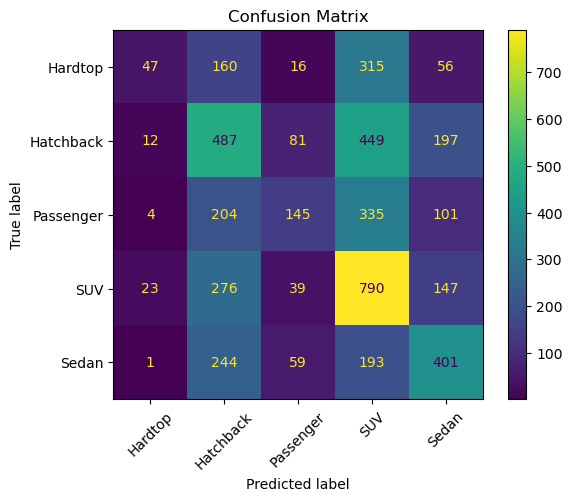

In [18]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

## Conclusion
### Best Predicted Category: SUV
Precision: 0.38

Recall: 0.62

F1 Score: 0.47
        Meaning: The model correctly identified 62% of actual SUV buyers and did so with reasonable precision. This category had the highest performance.

### Weakest Category: Hardtop
Precision: 0.54 (somewhat precise)

Recall: 0.08 (very low)

F1 Score: 0.14
     Meaning: Even when the model predicts "Hardtop," it’s rarely correct — and it misses most actual Hardtop buyers.

### Other Classes:
Hatchback and Sedan had moderate results (F1 around 0.38–0.45)

Passenger cars were poorly predicted, with low recall and F1 (suggests overlap with other classes)

### Overall Performance:
Accuracy: 39%

Macro F1 Score: 0.34

Weighted F1 Score: 0.36
     Conclusion: The model performs better than random guessing, but not strong enough for deployment.